# Covid-19 Data Visualisation

In [12]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys



## Utility Function

In [13]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    

## Loading Covid Data

In [14]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Covid_19_Countires_Wise = Covid_19_Countires_Wise.dropna()
Covid_19_Countires_Wise 

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
63663,2020-12-10,Zimbabwe,11081,9253,305
63664,2020-12-11,Zimbabwe,11162,9324,306
63665,2020-12-12,Zimbabwe,11219,9359,307
63666,2020-12-13,Zimbabwe,11246,9451,307


## Covid_19_Countires_Wise Analysis

In [15]:
## Check the List of Countries avaialable

count_avalaible(Covid_19_Countires_Wise,'Country')

#print(set(Covid_19_Countires_Wise['Country']))

Panama | West Bank and Gaza | Venezuela | Switzerland | China | Marshall Islands | Somalia | 
Uganda | Bahamas | Sierra Leone | Israel | Kenya | Papua New Guinea | Uzbekistan | 
Algeria | Haiti | Italy | Lebanon | Mexico | Malaysia | Tanzania | 
Belarus | Spain | Denmark | Azerbaijan | Colombia | Saint Vincent and the Grenadines | Rwanda | 
Ireland | Gambia | Kazakhstan | Trinidad and Tobago | Chad | Mauritania | Dominican Republic | 
Burkina Faso | Cambodia | Saint Lucia | Yemen | Russia | Jordan | Poland | 
Portugal | Saint Kitts and Nevis | Belize | Austria | Ethiopia | Maldives | Australia | 
Bhutan | Grenada | Sweden | Dominica | Bolivia | Sao Tome and Principe | Holy See | 
Malta | Tajikistan | Luxembourg | Bosnia and Herzegovina | Chile | Romania | Ukraine | 
Iraq | Peru | India | Armenia | Japan | Libya | Oman | 
Singapore | South Africa | Burma | Mauritius | Timor-Leste | Cabo Verde | United Arab Emirates | 
Mongolia | Taiwan* | Gabon | Burundi | Sri Lanka | Latvia | Vanuatu |

In [16]:
filter1 = Covid_19_Countires_Wise['Country'] == 'Japan'
Covid_19_Countires_Wise_country_specific = Covid_19_Countires_Wise[filter1]
Covid_19_Countires_Wise_country_specific
#Covid_19_Countires_Wise                    ## Uncomment this to view for all countires at once

,Date,Country,Confirmed,Recovered,Deaths
28996,2020-01-22,Japan,2,0,0
28997,2020-01-23,Japan,2,0,0
28998,2020-01-24,Japan,2,0,0
28999,2020-01-25,Japan,2,0,0
29000,2020-01-26,Japan,4,1,0
...,...,...,...,...,...
29319,2020-12-10,Japan,172406,142850,2395
29320,2020-12-11,Japan,175310,144858,2446
29321,2020-12-12,Japan,178272,147368,2462
29322,2020-12-13,Japan,180639,149130,2481


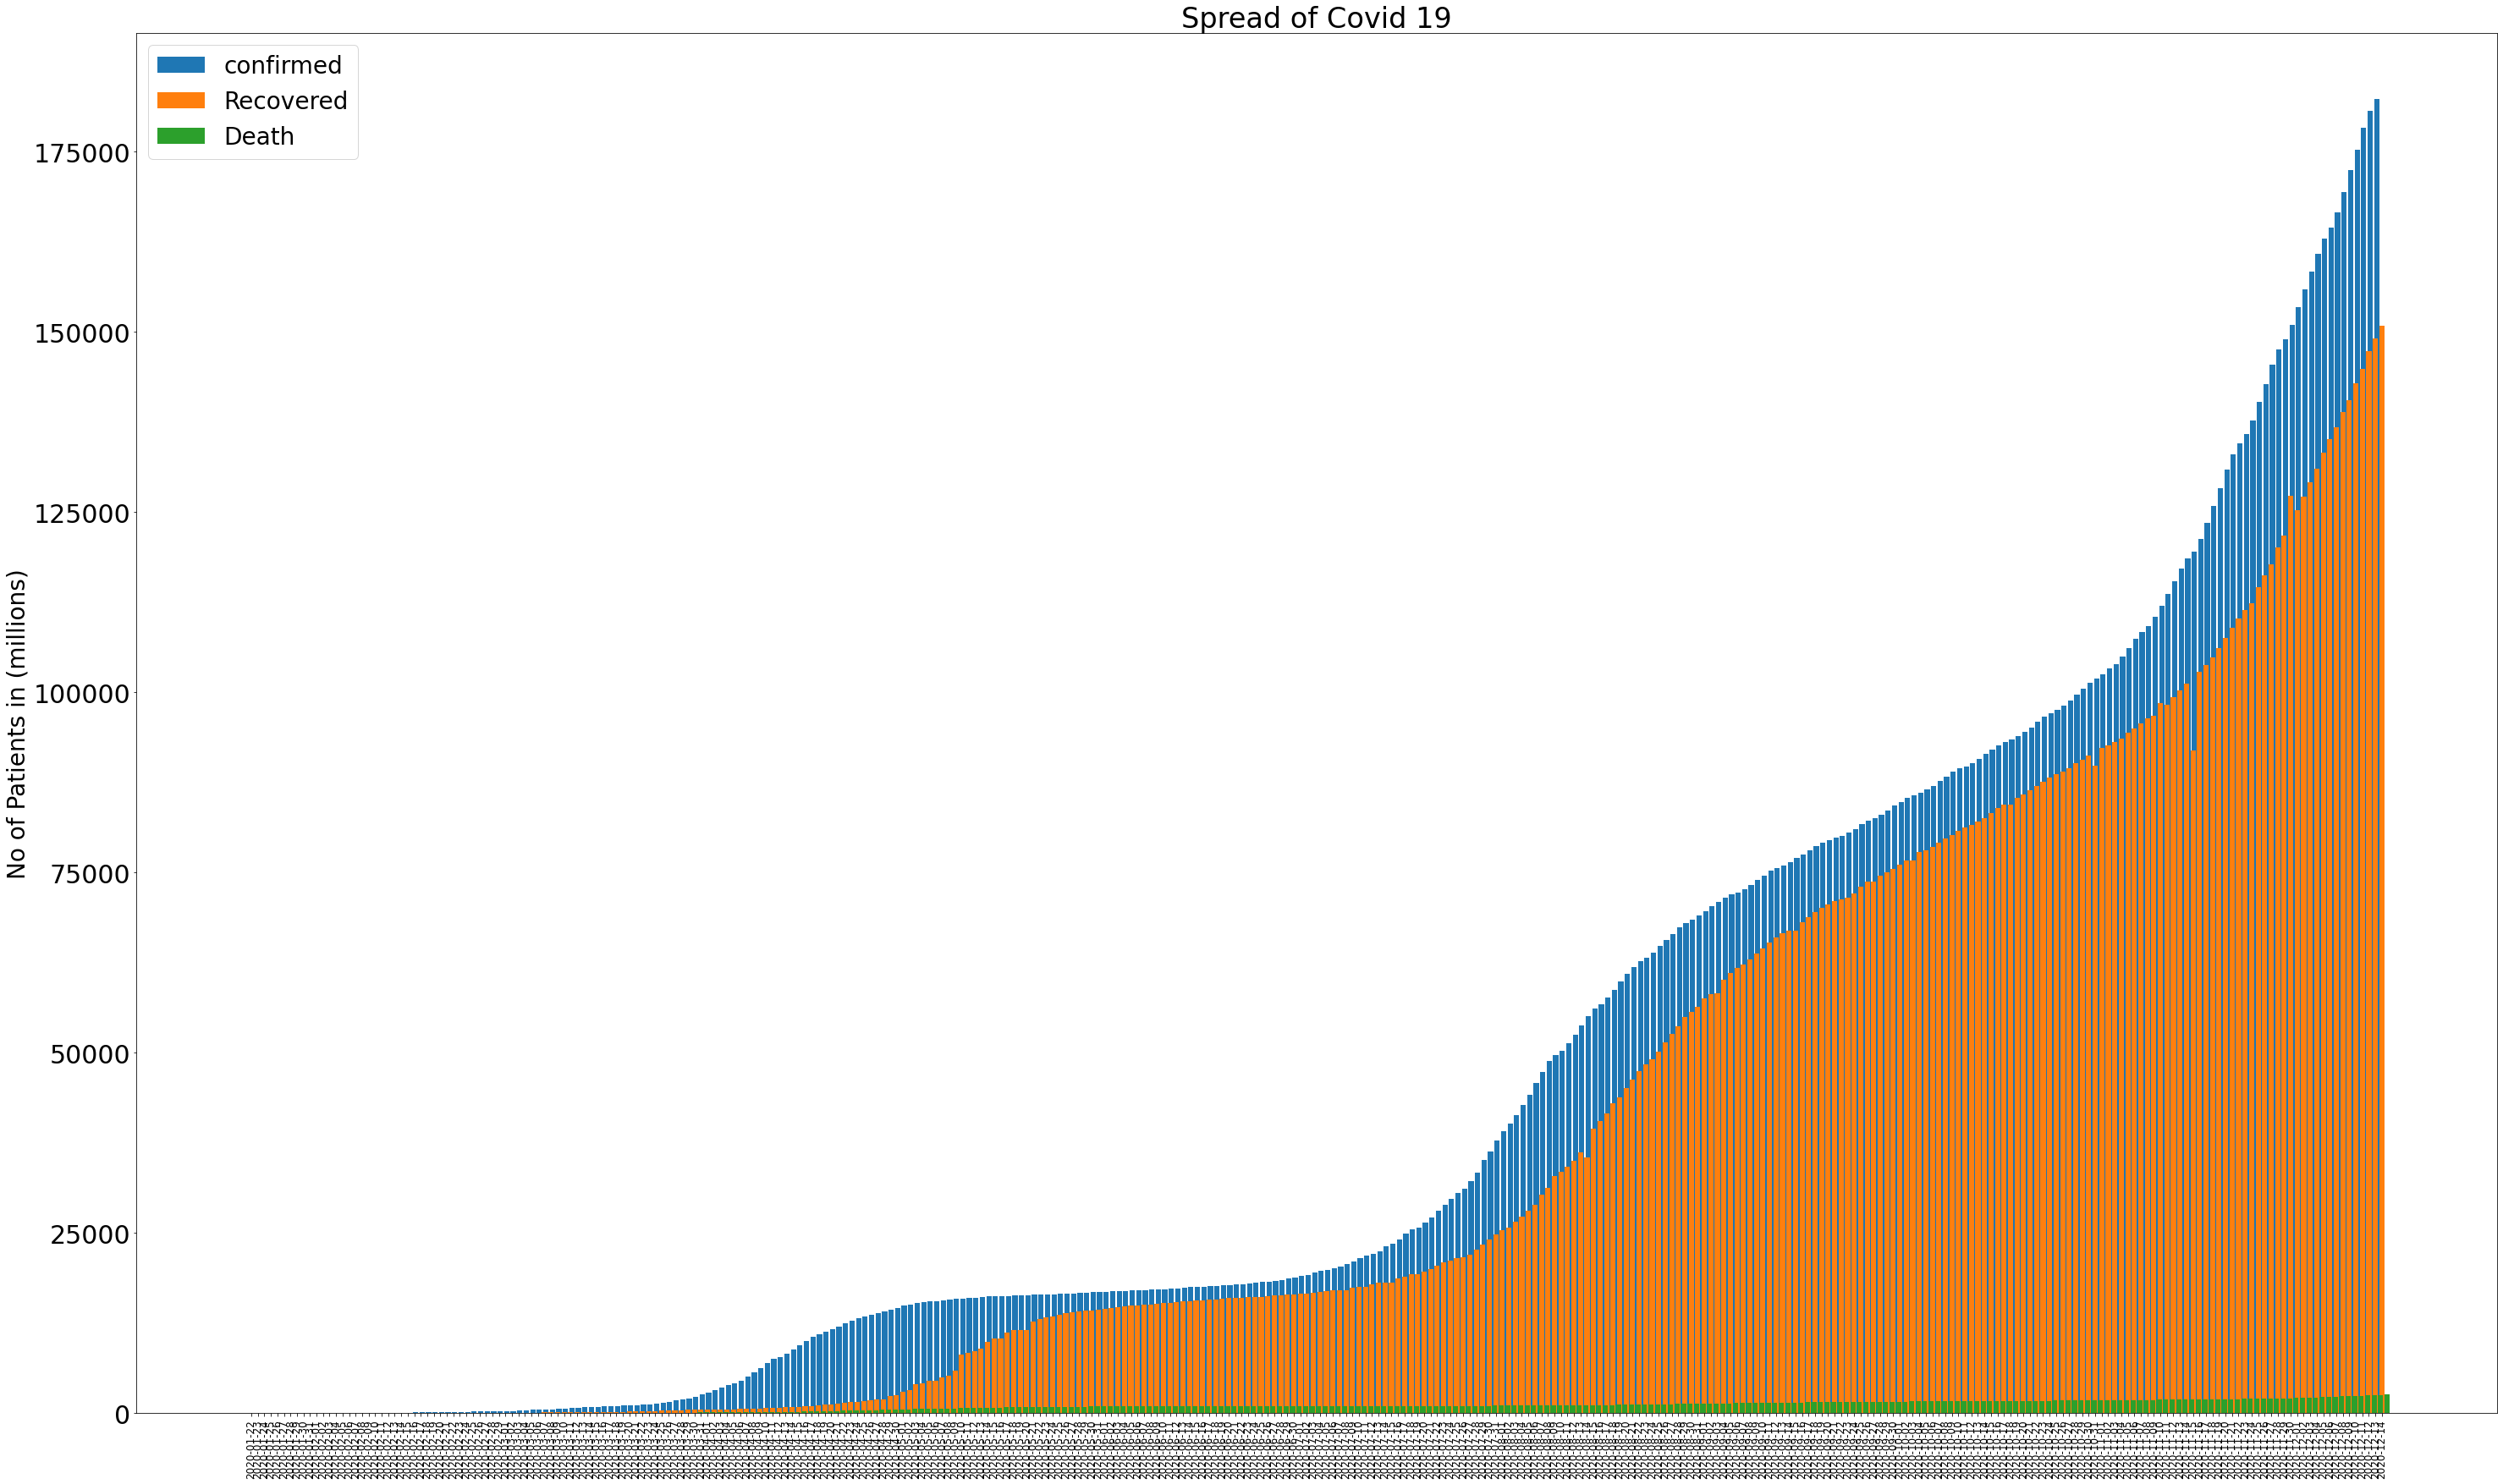

In [17]:
Visualize(Covid_19_Countires_Wise , ['Japan'],'Spread of Covid 19','No of Patients in (millions)')

## Data Preprocessing

In [18]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]
print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
print(n)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [11219 9359 307]
 [11246 9451 307]
 [11358 9554 309]]
328


## Creating Custom Time Series Model

In [19]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    return new_val
                
No_of_days_to_predict_in_future = 10         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 


val123



% completed = 42.70833333333333
% completed = 85.41666666666666


,Date,Country,Confirmed,Recovered,Deaths
0,2020-12-15,Panama,12995,8793,277
1,2020-12-16,Panama,13092,8873,279
2,2020-12-17,Panama,13188,8952,281
3,2020-12-18,Panama,13282,9030,283
4,2020-12-19,Panama,13375,9107,285
...,...,...,...,...,...
2107,2020-12-21,Central African Republic,762,237,8
2108,2020-12-22,Central African Republic,765,238,8
2109,2020-12-23,Central African Republic,769,239,8
2110,2020-12-24,Central African Republic,772,241,9


In [20]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
print(val[:,[2]].astype(np.int))    
print(val[:,[2]].astype(np.int)*w1)
#val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

[[12995]
 [13092]
 [13188]
 ...
 [  769]
 [  772]
 [  775]]
[[1.29950000e+04 1.29888471e+04 1.29826941e+04 ... 1.84588068e+01
  1.23058712e+01 6.15293561e+00]
 [1.30920000e+04 1.30858011e+04 1.30796023e+04 ... 1.85965909e+01
  1.23977273e+01 6.19886364e+00]
 [1.31880000e+04 1.31817557e+04 1.31755114e+04 ... 1.87329545e+01
  1.24886364e+01 6.24431818e+00]
 ...
 [7.69000000e+02 7.68635890e+02 7.68271780e+02 ... 1.09232955e+00
  7.28219697e-01 3.64109848e-01]
 [7.72000000e+02 7.71634470e+02 7.71268939e+02 ... 1.09659091e+00
  7.31060606e-01 3.65530303e-01]
 [7.75000000e+02 7.74633049e+02 7.74266098e+02 ... 1.10085227e+00
  7.33901515e-01 3.66950758e-01]]


In [21]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
val123

,Date,Country,Confirmed,Recovered,Deaths
1958,2020-12-15,US,1189071,382118,44554
1959,2020-12-16,US,1191932,383213,44619
1960,2020-12-17,US,1194768,384299,44683
1961,2020-12-18,US,1197579,385376,44747
1962,2020-12-19,US,1200365,386444,44810
1963,2020-12-20,US,1203127,387502,44872
1964,2020-12-21,US,1205864,388552,44934
1965,2020-12-22,US,1208577,389592,44995
1966,2020-12-23,US,1211267,390624,45056
1967,2020-12-24,US,1213933,391646,45116


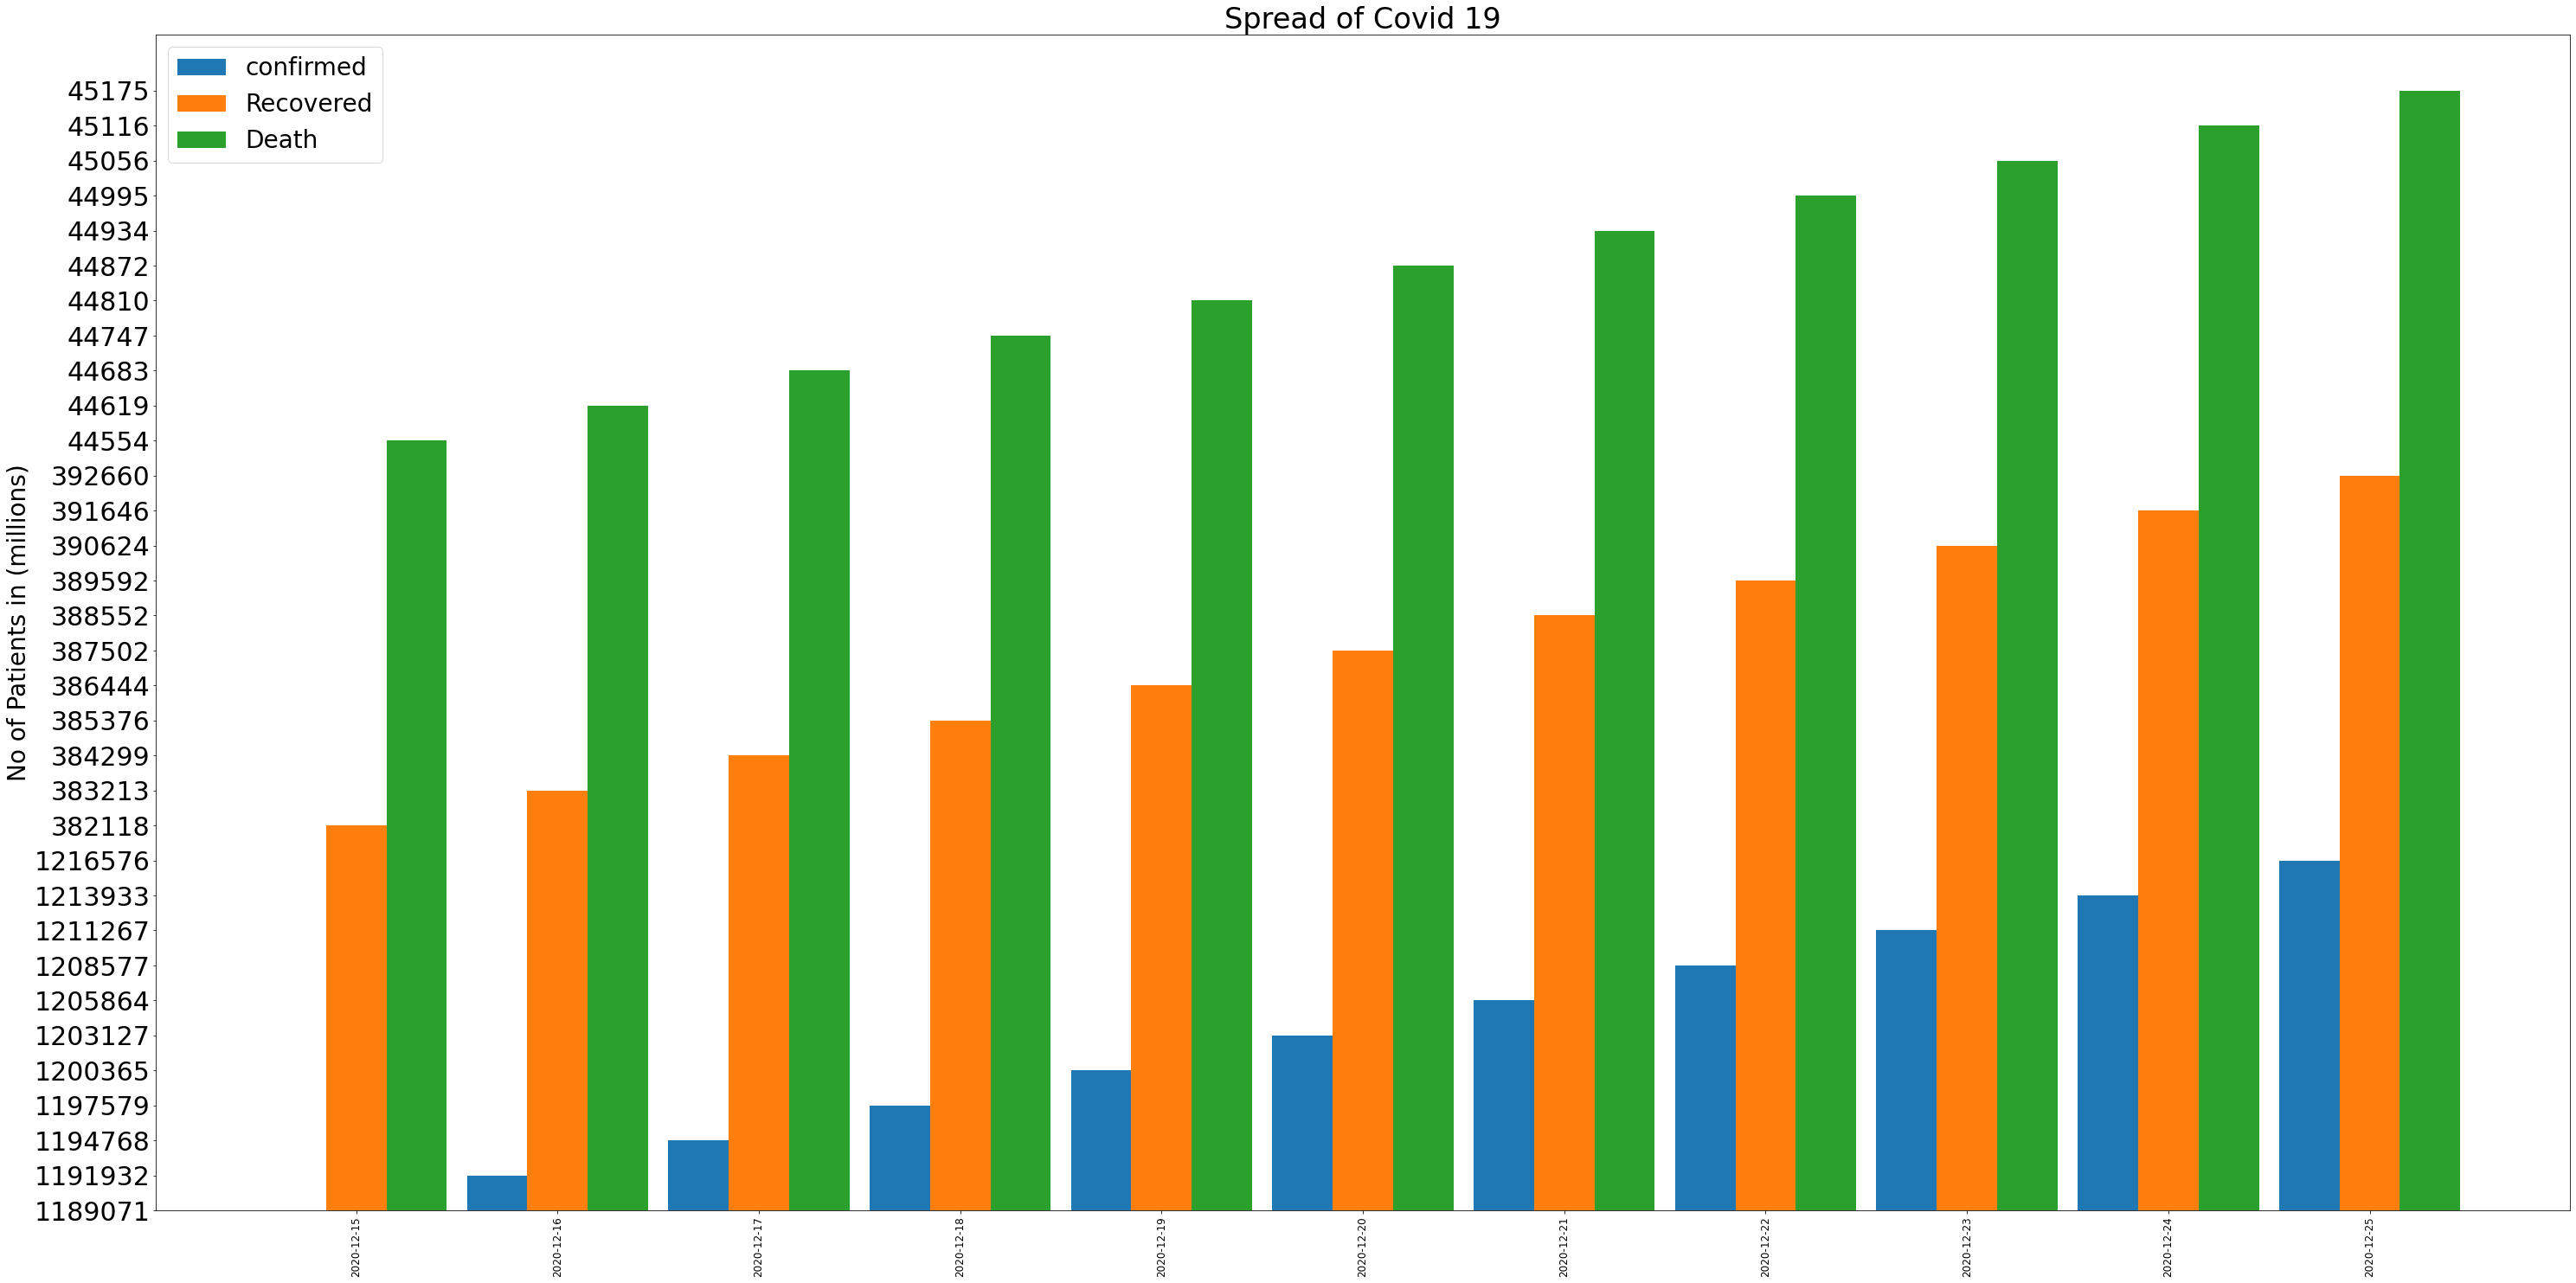

In [22]:
#print(Covid_19_Countires_Wise)
Visualize(val123, 
          ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)